In [4]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2023-07-26 16:01:43.639104: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 16:01:43.692085: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 16:01:43.693254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 16:01:44.524917: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [10]:
def preprocess(sample_path, results_path):
    #read adata and specify results file
    adata = sc.read_h5ad(sample_path) #note, there are various scanpy read functions depending on exact format of matrix (h5, h5ad, etc)
    
    adata.var_names_make_unique()
    
    #basic filtering
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
        
    #normalize -> note that SATURN does not work with log transformed data, and performs better when HV genes are NOT pre-extracted
    sc.pp.normalize_total(adata, target_sum=1e4)

    #PCA, Neighborhood, Leiden, UMAP
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40) 
    sc.tl.leiden(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color='leiden')
    adata.write(results_path)

    return adata




filtered out 56 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:24)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


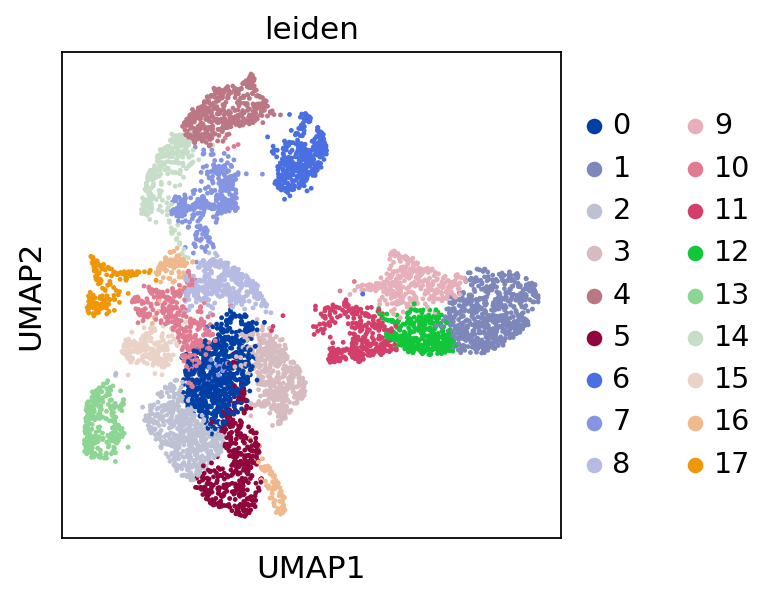

PermissionError: [Errno 13] Unable to create file (unable to open file: name = '/home/apennacchio/pcsct/star/sbicolor_root10/pp_sbi10', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 242)

In [11]:
#update PATHs to unprocessed matrices
preprocess("/home/apennacchio/pcsct/star/sbicolor_root10/Solo.out/GeneFull/filtered/sbicolor_root10.h5ad", "/home/apennacchio/pcsct/star/sbicolor_root10/pp_sbi10.h5ad")
preprocess("/home/apennacchio/pcsct/star/zmays_root2/Solo.out/GeneFull/filtered/zmays_root2.h5ad", "/home/apennacchio/pcsct/star/zmays_root2/pp_zma2.h5ad")